<a href="https://colab.research.google.com/github/Saeed-Lababidi/CS313/blob/main/CS313_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset/online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [38]:
# Check for missing values
data.isnull().sum()

# Drop rows with missing values (if any)
data = data.dropna()

In [39]:
# Handle outliers for numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

In [40]:
# Creating a Total_Duration feature
data['Total_Duration'] = data['Administrative_Duration'] + data['Informational_Duration'] + data['ProductRelated_Duration']
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Total_Duration
5,-0.668335,-0.621789,0.0,0.0,0.243159,-0.765198,0.545920,-0.384602,0.0,0.0,-1.229122,-0.503428,0.0,-0.927481,0.225623,0.503427,False,False,-1.386987
26,1.419408,0.789266,0.0,0.0,1.281796,1.409626,-0.379155,-0.981162,0.0,0.0,-1.229122,-0.503428,0.0,-0.927481,0.225623,0.503427,False,False,2.198892
32,-0.668335,-0.621789,0.0,0.0,-0.635688,-0.642666,-0.583532,-0.367202,0.0,0.0,-1.229122,-0.503428,0.0,-0.927481,-0.945994,0.503427,False,False,-1.264455
34,-0.668335,-0.621789,0.0,0.0,-0.156317,-0.263657,0.438353,-0.225519,0.0,0.0,-1.229122,-0.503428,0.0,-0.927481,-0.945994,0.503427,False,False,-0.885446
36,-0.668335,-0.621789,0.0,0.0,-0.635688,-0.247033,1.204766,0.872525,0.0,0.0,-1.229122,1.187023,0.0,-0.927481,0.811432,0.503427,True,False,-0.868822


In [41]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Normalize numerical variables
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Total_Duration
5,-0.525682,-0.487562,0.0,0.0,0.351514,-0.842986,1.044880,-0.406852,0.0,0.0,-1.332639,-0.477235,0.0,-0.918655,0.902354,-1.110223e-16,False,False,-0.961060
26,2.949213,2.723133,0.0,0.0,1.595509,1.908822,-0.347585,-1.223348,0.0,0.0,-1.332639,-0.477235,0.0,-0.918655,0.902354,-1.110223e-16,False,False,2.952859
32,-0.525682,-0.487562,0.0,0.0,-0.701097,-0.687947,-0.655223,-0.383037,0.0,0.0,-1.332639,-0.477235,0.0,-0.918655,-1.116977,-1.110223e-16,False,False,-0.827319
34,-0.525682,-0.487562,0.0,0.0,-0.126946,-0.208385,0.882966,-0.189119,0.0,0.0,-1.332639,-0.477235,0.0,-0.918655,-1.116977,-1.110223e-16,False,False,-0.413637
36,-0.525682,-0.487562,0.0,0.0,-0.701097,-0.187352,2.036607,1.313744,0.0,0.0,-1.332639,1.231530,0.0,-0.918655,1.912020,-1.110223e-16,True,False,-0.395493


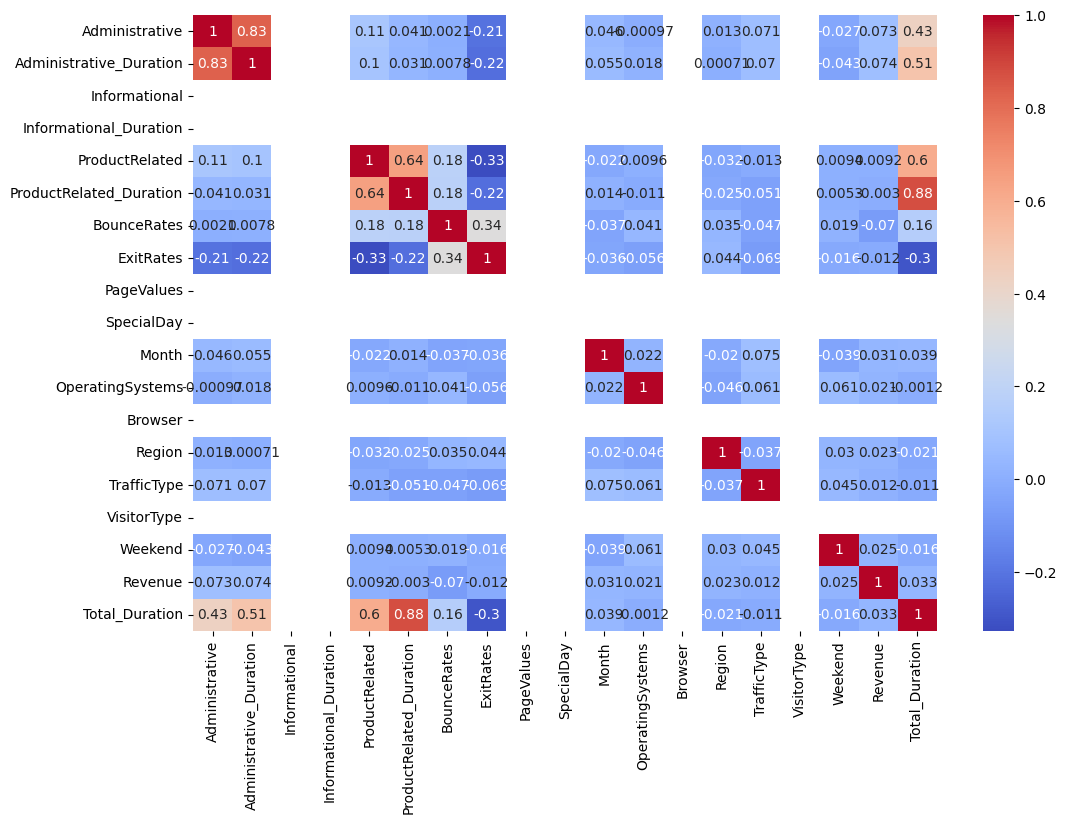

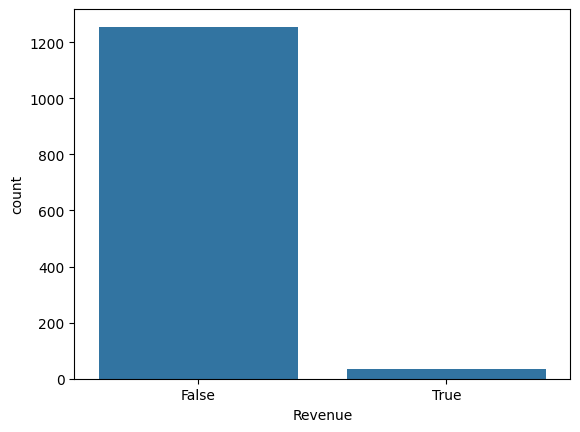

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Distribution of the target variable
sns.countplot(x='Revenue', data=data)
plt.show()

In [43]:
from sklearn.model_selection import train_test_split

X = data.drop('Revenue', axis=1)
y = data['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99       253
        True       0.00      0.00      0.00         5

    accuracy                           0.98       258
   macro avg       0.49      0.50      0.49       258
weighted avg       0.96      0.98      0.97       258

[[252   1]
 [  5   0]]


In [45]:
from sklearn.model_selection import GridSearchCV

# Grid search for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='f1')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred_optimized = best_model.predict(X_test)

# Evaluate the optimized model
print(classification_report(y_test, y_pred_optimized))
print(confusion_matrix(y_test, y_pred_optimized))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99       253
        True       0.00      0.00      0.00         5

    accuracy                           0.98       258
   macro avg       0.49      0.50      0.49       258
weighted avg       0.96      0.98      0.97       258

[[252   1]
 [  5   0]]


In [46]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the model again with the balanced dataset
model_smote = RandomForestClassifier(random_state=42)
model

RandomForestClassifier(random_state=42)